# Medical Heart Data Checkup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv("heart.csv")
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
df=data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df['age'].max()

77

In [13]:
# total data set madhe kiti male ahe ani kiti female ahe te show karnya sathi use hotot
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [18]:
#df["ChestPainType"].unique()

array([3, 2, 1, 0], dtype=int64)

In [17]:
#df["ChestPainType"].value_counts()

In [19]:
#df.groupby("ChestPainType").sum("Sex")

In [22]:
df.groupby("sex").sum("age")

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,,,,,,,,,,,,,
0,5345,100,12776,25085,12,55,14508,22,84.1,137,53,204,72
1,11128,193,27106,49533,33,105,30835,77,230.9,287,168,497,93


In [15]:
df.rename(columns={"RestingBP":"Bp"},inplace=True)

In [16]:
df["Bp"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

In [17]:
df["Bp"].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: Bp, Length: 67, dtype: int64

In [18]:
df["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [19]:
df["FastingBS"].unique()

array([0, 1], dtype=int64)

In [20]:
df["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [21]:
df.groupby("FastingBS").sum("ChestPainType")

,Age,Bp,Cholesterol,MaxHR,Oldpeak,HeartDisease
FastingBS,,,,,,
0,36947,92703,151029,97612,602.9,338
1,12176,28837,31469,27979,211.7,170


In [22]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [23]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [24]:
df.groupby("Bp").sum("RestingECG")

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Bp,,,,,,
0,55,0,0,155,1.5,1
80,53,0,0,141,2.0,0
92,38,117,0,134,2.5,1
94,90,426,0,333,0.0,0
95,296,0,6,806,5.5,6
...,...,...,...,...,...,...
180,676,3024,3,1587,12.1,6
185,63,0,0,98,0.0,1
190,100,528,1,256,2.0,1


In [25]:
df["MaxHR"].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202], dtype=int64)

In [26]:
df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [27]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [28]:
df.groupby("ExerciseAngina").sum("sex")

,Age,Bp,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ExerciseAngina,,,,,,,
N,28354,71128,110426,116,79081,289.1,192
Y,20769,50412,72072,98,46510,525.5,316


In [29]:
df["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [30]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [31]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [32]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [33]:
df["HeartDisease"].unique()

array([0, 1], dtype=int64)

In [34]:
# data set madhe je column nako ahe te column drop kara khalil pramane
df.drop(columns=["Oldpeak"],inplace=True)

In [35]:
df.drop("MaxHR",axis=1,inplace=True)

In [36]:
df.shape

(918, 10)

In [37]:
df.head(5)

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,N,Up,0
1,49,F,NAP,160,180,0,Normal,N,Flat,1
2,37,M,ATA,130,283,0,ST,N,Up,0
3,48,F,ASY,138,214,0,Normal,Y,Flat,1
4,54,M,NAP,150,195,0,Normal,N,Up,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   Bp              918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   RestingECG      918 non-null    object
 7   ExerciseAngina  918 non-null    object
 8   ST_Slope        918 non-null    object
 9   HeartDisease    918 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 71.8+ KB


<Axes: >

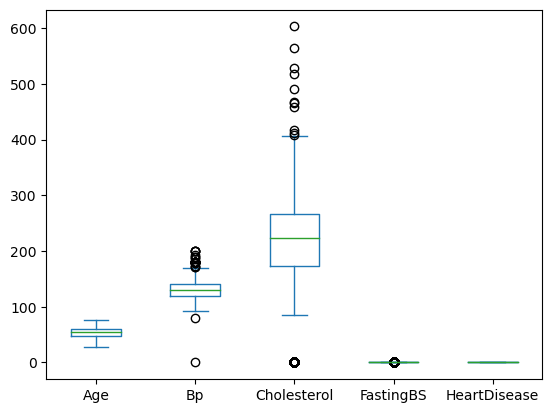

In [39]:
df.plot.box()

In [40]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,0.553377
std,9.432617,18.514154,109.384145,0.423046,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x16607364710>,
 'caps': [<matplotlib.lines.Line2D at 0x16607339550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16606af0150>],
 'medians': [<matplotlib.lines.Line2D at 0x16607367610>],
 'fliers': [<matplotlib.lines.Line2D at 0x166073700d0>],
 'means': []}

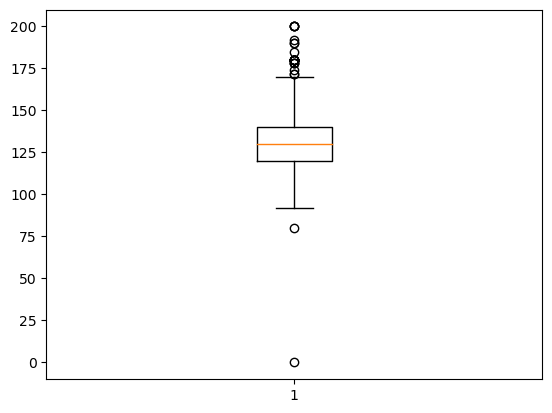

In [41]:
plt.boxplot(df["Bp"])

In [42]:
df["Bp"].quantile([0.90,0.91])

0.90    160.0
0.91    160.0
Name: Bp, dtype: float64

In [43]:
df[df["Bp"]<df["Bp"].quantile(0.01)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
227,38,M,ASY,92,117,0,Normal,Y,Flat,1
314,53,M,ASY,80,0,0,Normal,Y,Down,0
449,55,M,NAP,0,0,0,Normal,N,Flat,1
692,39,F,NAP,94,199,0,Normal,N,Up,0
832,51,M,NAP,94,227,0,Normal,Y,Up,0


In [44]:
df.shape

(918, 10)

In [45]:
df=df[df["Bp"]!=0]

In [46]:
df.shape

(917, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x166073d7ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x166073a1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x166073d6f50>],
 'medians': [<matplotlib.lines.Line2D at 0x166073e6850>],
 'fliers': [<matplotlib.lines.Line2D at 0x166073e4d10>],
 'means': []}

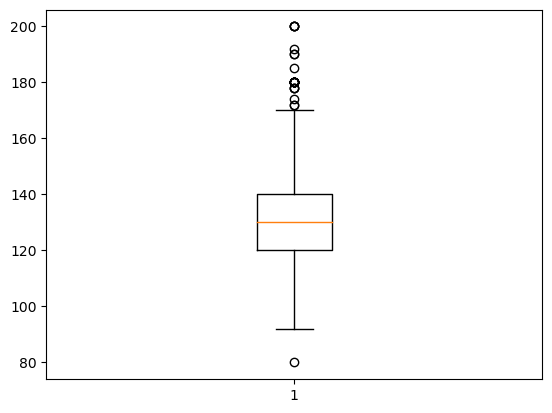

In [47]:
plt.boxplot(df["Bp"])

In [48]:
df[df["Bp"]<df["Bp"].quantile(0.05)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
18,60,M,ASY,100,248,0,Normal,N,Flat,1
20,43,F,TA,100,223,0,Normal,N,Up,0
60,49,M,ATA,100,253,0,Normal,N,Up,0
115,33,F,ASY,100,246,0,Normal,Y,Flat,1
151,48,M,ATA,100,159,0,Normal,N,Up,0
203,31,F,ATA,100,219,0,ST,N,Up,0
210,48,M,ASY,106,263,1,Normal,N,Flat,1
227,38,M,ASY,92,117,0,Normal,Y,Flat,1
267,34,M,ATA,98,220,0,Normal,N,Up,0
271,32,F,ATA,105,198,0,Normal,N,Up,0


In [49]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,0.552890
std,9.437636,17.999749,109.246330,0.423206,0.497466
min,28.000000,80.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,1.000000


In [50]:
df=df[df["Bp"]!=80]

{'whiskers': [<matplotlib.lines.Line2D at 0x16606b70ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x16606b49550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16606b701d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16606b73cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16606b6b8d0>],
 'means': []}

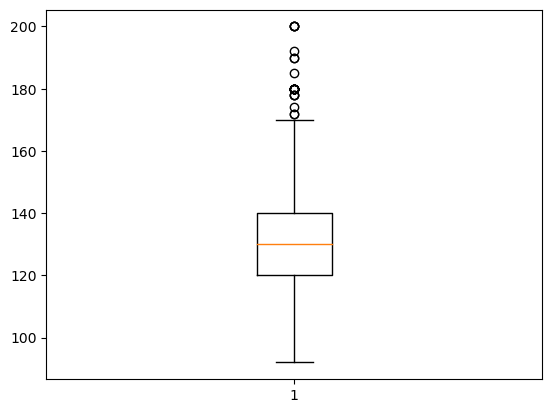

In [51]:
plt.boxplot(df["Bp"])

In [52]:
df[df["Bp"]>df["Bp"].quantile(0.98)]


,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,N,Up,0
241,54,M,ASY,200,198,0,Normal,Y,Flat,1
365,64,F,ASY,200,0,0,Normal,Y,Flat,1
372,63,M,ASY,185,0,0,Normal,Y,Up,1
399,61,M,NAP,200,0,1,ST,N,Flat,1
592,61,M,ASY,190,287,1,LVH,Y,Down,1
732,56,F,ASY,200,288,1,LVH,Y,Down,1
759,54,M,ATA,192,283,0,LVH,N,Up,1


{'whiskers': [<matplotlib.lines.Line2D at 0x16606bd0910>,
 'caps': [<matplotlib.lines.Line2D at 0x16606bb1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16606bc3c10>],
 'medians': [<matplotlib.lines.Line2D at 0x16606bd3850>],
 'fliers': [<matplotlib.lines.Line2D at 0x16606bdc2d0>],
 'means': []}

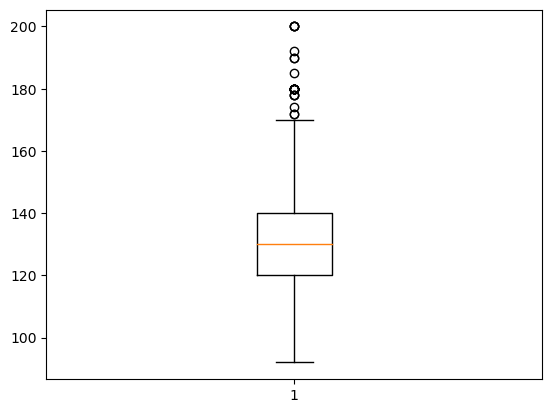

In [53]:
plt.boxplot(df["Bp"])

In [54]:
df=df[df["Bp"]<192]

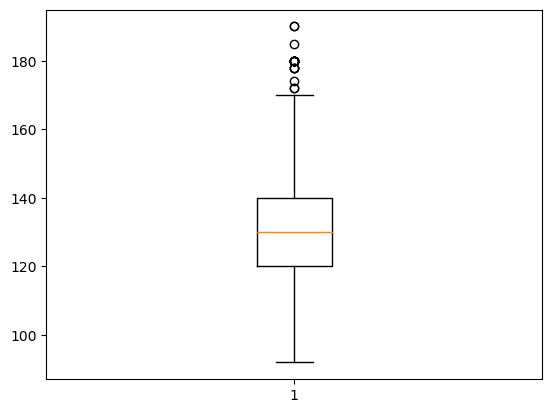

In [55]:
plt.boxplot(df["Bp"])
plt.show()

In [56]:
df[df["Bp"]>df["Bp"].quantile(0.98)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,N,Up,0
123,58,F,ATA,180,393,0,Normal,Y,Flat,1
189,53,M,ASY,180,285,0,ST,Y,Flat,1
190,46,M,ASY,180,280,0,ST,N,Up,0
274,45,F,ATA,180,295,0,Normal,N,Up,0
275,59,M,NAP,180,213,0,Normal,N,Up,0
278,57,F,ASY,180,347,0,ST,Y,Flat,0
372,63,M,ASY,185,0,0,Normal,Y,Up,1
411,54,M,ASY,180,0,1,Normal,N,Flat,1
423,60,M,NAP,180,0,0,ST,Y,Flat,0


In [57]:
df=df[df["Bp"]<174]

{'whiskers': [<matplotlib.lines.Line2D at 0x166074810d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16607482790>,
 'boxes': [<matplotlib.lines.Line2D at 0x16607449b50>],
 'medians': [<matplotlib.lines.Line2D at 0x16607483c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x16606ae4710>],
 'means': []}

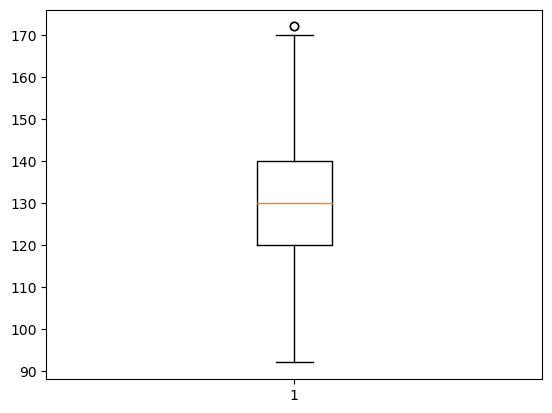

In [58]:
plt.boxplot(df["Bp"])

In [59]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,892.000000,892.000000,892.000000,892.000000,892.000000
mean,53.412556,131.205157,198.912556,0.230942,0.550448
std,9.489446,15.939823,108.525311,0.421672,0.497728
min,28.000000,92.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,174.750000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,1.000000
75%,60.000000,140.000000,265.250000,0.000000,1.000000
max,77.000000,172.000000,603.000000,1.000000,1.000000


In [60]:
df[df["Bp"]>df["Bp"].quantile(0.99)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
550,55,M,ASY,172,260,0,Normal,N,Flat,1
880,52,M,NAP,172,199,1,Normal,N,Up,0


In [61]:
df=df[df["Bp"]!=172]

{'whiskers': [<matplotlib.lines.Line2D at 0x166074edc50>,
 'caps': [<matplotlib.lines.Line2D at 0x16606951550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16607450150>],
 'medians': [<matplotlib.lines.Line2D at 0x166074f87d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16606bf9290>],
 'means': []}

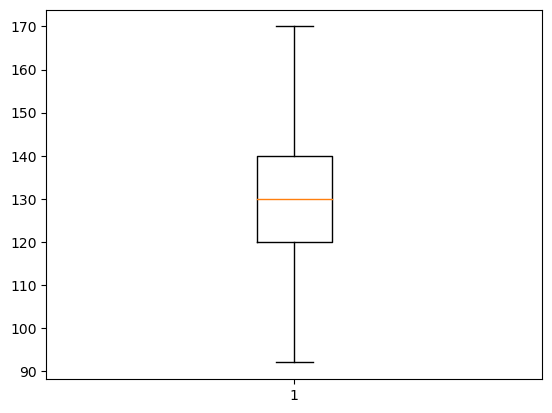

In [62]:
plt.boxplot(df["Bp"])

<Axes: >

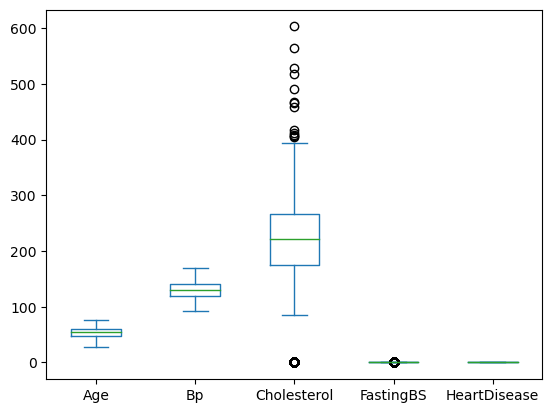

In [63]:
df.plot.box()

{'whiskers': [<matplotlib.lines.Line2D at 0x16608723750>,
 'caps': [<matplotlib.lines.Line2D at 0x1660872ce50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16608722b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1660872e490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1660872c390>],
 'means': []}

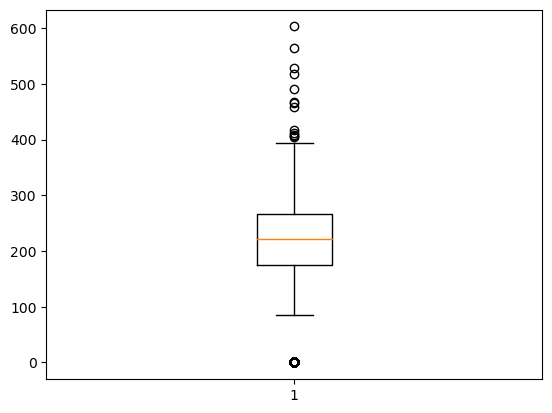

In [64]:
plt.boxplot(df["Cholesterol"])

In [65]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,890.000000,890.000000,890.000000,890.000000,890.000000
mean,53.412360,131.113483,198.843820,0.230337,0.550562
std,9.499847,15.839732,108.627977,0.421285,0.497717
min,28.000000,92.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,174.250000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,1.000000
75%,60.000000,140.000000,265.750000,0.000000,1.000000
max,77.000000,170.000000,603.000000,1.000000,1.000000


In [66]:
df[df["Cholesterol"]<df["Cholesterol"].quantile(0.19)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
78,52,M,ATA,140,100,0,Normal,Y,Up,0
98,56,M,ASY,120,85,0,Normal,N,Up,0
293,65,M,ASY,115,0,0,Normal,Y,Flat,1
294,32,M,TA,95,0,1,Normal,N,Up,1
295,61,M,ASY,105,0,1,Normal,Y,Up,1
...,...,...,...,...,...,...,...,...,...,...
518,48,M,NAP,102,0,1,ST,Y,Down,1
535,56,M,ASY,130,0,0,LVH,Y,Flat,1
536,62,M,NAP,133,0,1,ST,Y,Flat,1
541,76,M,NAP,104,113,0,LVH,N,Down,1


In [67]:
df=df[df["Cholesterol"]!=0]

{'whiskers': [<matplotlib.lines.Line2D at 0x166086b7d50>,
 'caps': [<matplotlib.lines.Line2D at 0x16607595090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1660757ec90>],
 'medians': [<matplotlib.lines.Line2D at 0x16607596550>],
 'fliers': [<matplotlib.lines.Line2D at 0x166086fc190>],
 'means': []}

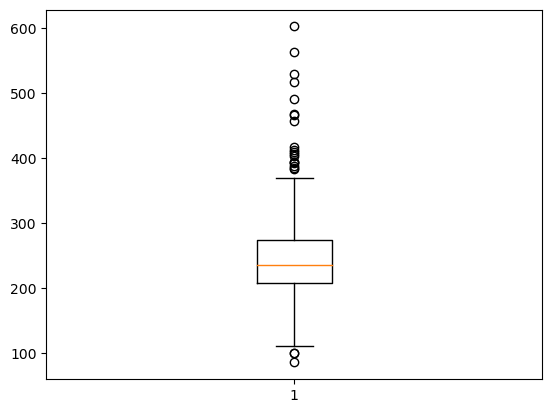

In [68]:
plt.boxplot(df["Cholesterol"])

In [69]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,726.000000,726.000000,726.000000,726.000000,726.000000
mean,52.800275,131.665289,243.761708,0.163912,0.473829
std,9.557668,15.376366,59.202397,0.370451,0.499659
min,28.000000,92.000000,85.000000,0.000000,0.000000
25%,46.000000,120.000000,207.000000,0.000000,0.000000
50%,54.000000,130.000000,236.000000,0.000000,0.000000
75%,59.000000,140.000000,274.000000,0.000000,1.000000
max,77.000000,170.000000,603.000000,1.000000,1.000000


In [70]:
df["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 255, 276, 282, 338, 160, 156, 272,
       240, 161, 228, 292, 388, 241, 166, 247, 331, 341, 243, 279, 198,
       249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320, 187,
       266, 287, 404, 312, 251, 328, 192, 193, 308, 219, 257, 132, 226,
       280, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309, 200, 336,
       355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220, 242, 344,
       358, 169, 181, 236, 203, 153, 316, 311, 252, 458, 384, 258, 349,
       142, 197, 113, 261, 310, 232, 110, 123, 170, 369, 152, 24

In [71]:
df[df["Cholesterol"]>df["Cholesterol"].quantile(0.01)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,N,Up,0
1,49,F,NAP,160,180,0,Normal,N,Flat,1
2,37,M,ATA,130,283,0,ST,N,Up,0
3,48,F,ASY,138,214,0,Normal,Y,Flat,1
4,54,M,NAP,150,195,0,Normal,N,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,N,Flat,1
914,68,M,ASY,144,193,1,Normal,N,Flat,1
915,57,M,ASY,130,131,0,Normal,Y,Flat,1
916,57,F,ATA,130,236,0,LVH,N,Flat,1


In [72]:
df=df[df["Cholesterol"]!=85]

{'whiskers': [<matplotlib.lines.Line2D at 0x166075eb350>,
 'caps': [<matplotlib.lines.Line2D at 0x166075f8a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x166075ea750>],
 'medians': [<matplotlib.lines.Line2D at 0x166075fa090>],
 'fliers': [<matplotlib.lines.Line2D at 0x166075ebe10>],
 'means': []}

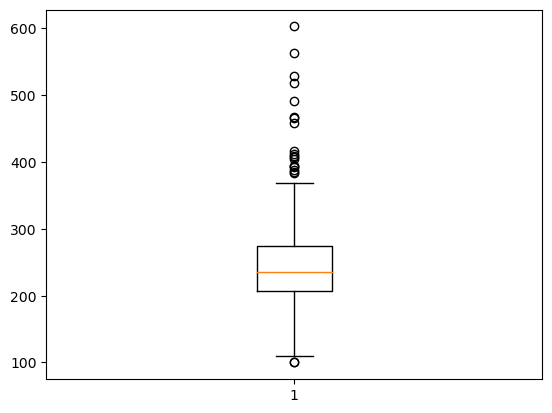

In [73]:
plt.boxplot(df["Cholesterol"])

In [74]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,725.000000,725.000000,725.000000,725.000000,725.000000
mean,52.795862,131.681379,243.980690,0.164138,0.474483
std,9.563526,15.380864,58.948307,0.370656,0.499693
min,28.000000,92.000000,100.000000,0.000000,0.000000
25%,46.000000,120.000000,207.000000,0.000000,0.000000
50%,54.000000,130.000000,236.000000,0.000000,0.000000
75%,59.000000,140.000000,274.000000,0.000000,1.000000
max,77.000000,170.000000,603.000000,1.000000,1.000000


In [75]:
df=df[df["Cholesterol"]!=100]

{'whiskers': [<matplotlib.lines.Line2D at 0x166088a6f50>,
 'caps': [<matplotlib.lines.Line2D at 0x16608879550>,
 'boxes': [<matplotlib.lines.Line2D at 0x166088a6310>],
 'medians': [<matplotlib.lines.Line2D at 0x166088adb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x166088ae6d0>],
 'means': []}

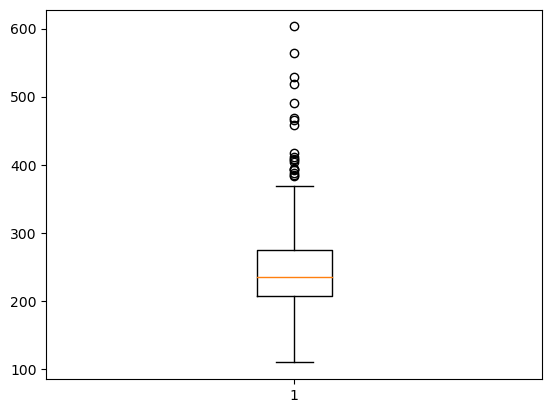

In [76]:
plt.boxplot(df["Cholesterol"])

In [77]:
df[df["Cholesterol"]>df["Cholesterol"].quantile(0.99)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,N,Up,0
30,53,M,NAP,145,518,0,Normal,N,Flat,1
76,32,M,ASY,118,529,0,Normal,N,Flat,1
103,40,M,ASY,120,466,1,Normal,Y,Flat,1
149,54,M,ASY,130,603,1,Normal,Y,Flat,1
250,44,M,ASY,135,491,0,Normal,N,Flat,1
496,58,M,ASY,132,458,1,Normal,N,Down,0
616,67,F,NAP,115,564,0,LVH,N,Flat,0


In [78]:
df=df[df["Cholesterol"]<518]

{'whiskers': [<matplotlib.lines.Line2D at 0x16607612010>,
 'caps': [<matplotlib.lines.Line2D at 0x166088e1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16608881190>],
 'medians': [<matplotlib.lines.Line2D at 0x16608913e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x166088c3e10>],
 'means': []}

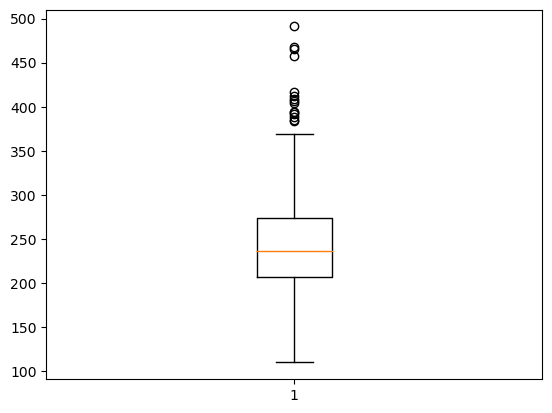

In [79]:
plt.boxplot(df["Cholesterol"])

In [80]:
df[df["Cholesterol"]>df["Cholesterol"].quantile(0.99)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,N,Up,0
69,44,M,ASY,150,412,0,Normal,N,Up,0
103,40,M,ASY,120,466,1,Normal,Y,Flat,1
250,44,M,ASY,135,491,0,Normal,N,Flat,1
496,58,M,ASY,132,458,1,Normal,N,Down,0
624,63,F,ASY,150,407,0,LVH,N,Flat,1
667,65,F,NAP,140,417,1,LVH,N,Up,0
796,56,F,ASY,134,409,0,LVH,Y,Flat,1


In [81]:
df=df[df["Cholesterol"]<407]

{'whiskers': [<matplotlib.lines.Line2D at 0x16608741fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x16608743690>,
 'boxes': [<matplotlib.lines.Line2D at 0x16608741450>],
 'medians': [<matplotlib.lines.Line2D at 0x16608754c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x16608755690>],
 'means': []}

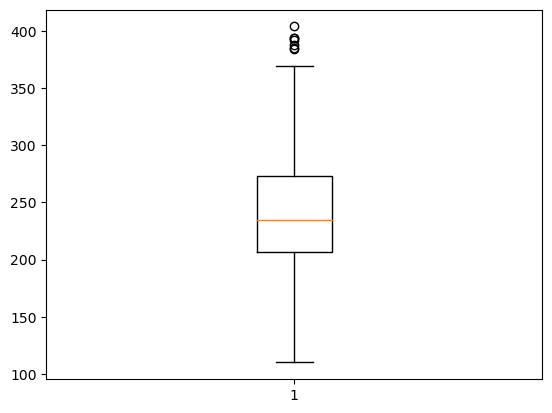

In [82]:
plt.boxplot(df["Cholesterol"])

In [83]:
df[df["Cholesterol"]>df["Cholesterol"].quantile(0.99)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
102,40,F,ASY,150,392,0,Normal,N,Flat,1
132,56,M,ASY,170,388,0,ST,Y,Flat,1
182,52,M,ASY,140,404,0,Normal,Y,Flat,1
256,55,F,ATA,130,394,0,LVH,N,Up,0
498,67,M,ASY,160,384,1,ST,Y,Flat,1
577,67,M,ASY,146,369,0,Normal,Y,Flat,1
613,58,M,ASY,140,385,1,LVH,N,Up,0
803,62,F,ASY,140,394,0,LVH,N,Flat,0


In [84]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,711.000000,711.000000,711.000000,711.000000,711.000000
mean,52.798875,131.683544,240.427567,0.161744,0.472574
std,9.565360,15.436549,49.781070,0.368475,0.499599
min,28.000000,92.000000,110.000000,0.000000,0.000000
25%,46.000000,120.000000,207.000000,0.000000,0.000000
50%,54.000000,130.000000,235.000000,0.000000,0.000000
75%,59.000000,140.000000,273.000000,0.000000,1.000000
max,77.000000,170.000000,404.000000,1.000000,1.000000


In [85]:
df=df[df["Cholesterol"]<394]

{'whiskers': [<matplotlib.lines.Line2D at 0x166087af610>,
 'caps': [<matplotlib.lines.Line2D at 0x166087bcb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x166087ae9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x166087be050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1660877f790>],
 'means': []}

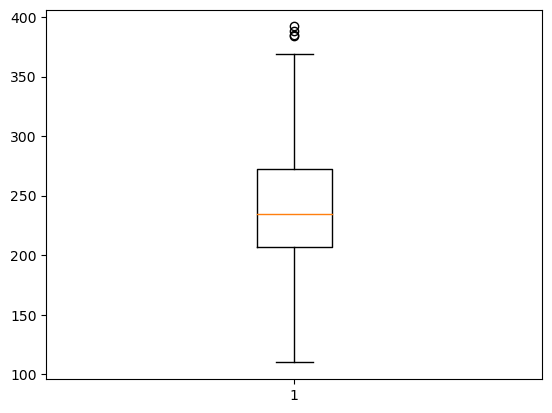

In [86]:
plt.boxplot(df["Cholesterol"])

In [87]:
df[df["Cholesterol"]>df["Cholesterol"].quantile(0.99)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
58,54,M,ASY,150,365,0,ST,N,Up,0
102,40,F,ASY,150,392,0,Normal,N,Flat,1
132,56,M,ASY,170,388,0,ST,Y,Flat,1
284,42,M,ASY,140,358,0,Normal,N,Up,0
498,67,M,ASY,160,384,1,ST,Y,Flat,1
577,67,M,ASY,146,369,0,Normal,Y,Flat,1
613,58,M,ASY,140,385,1,LVH,N,Up,0
738,65,F,NAP,160,360,0,LVH,N,Up,0


In [88]:
df=df[df["Cholesterol"]<385]

{'whiskers': [<matplotlib.lines.Line2D at 0x1660881ba10>,
 'caps': [<matplotlib.lines.Line2D at 0x166088252d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1660881af50>],
 'medians': [<matplotlib.lines.Line2D at 0x16608826850>],
 'fliers': [<matplotlib.lines.Line2D at 0x166086b72d0>],
 'means': []}

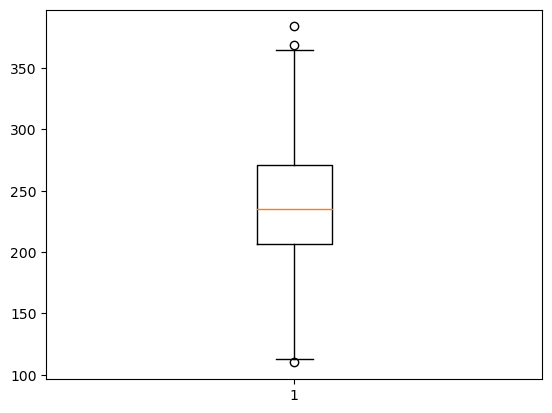

In [89]:
plt.boxplot(df["Cholesterol"])

In [90]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,705.000000,705.000000,705.000000,705.000000,705.000000
mean,52.790071,131.570213,239.130496,0.161702,0.472340
std,9.584473,15.409227,47.951295,0.368439,0.499589
min,28.000000,92.000000,110.000000,0.000000,0.000000
25%,46.000000,120.000000,207.000000,0.000000,0.000000
50%,54.000000,130.000000,235.000000,0.000000,0.000000
75%,59.000000,140.000000,271.000000,0.000000,1.000000
max,77.000000,170.000000,384.000000,1.000000,1.000000


In [91]:
df[df["Cholesterol"]>df["Cholesterol"].quantile(0.99)]

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
58,54,M,ASY,150,365,0,ST,N,Up,0
238,48,M,ASY,160,355,0,Normal,Y,Flat,1
284,42,M,ASY,140,358,0,Normal,N,Up,0
498,67,M,ASY,160,384,1,ST,Y,Flat,1
577,67,M,ASY,146,369,0,Normal,Y,Flat,1
686,57,F,ASY,120,354,0,Normal,Y,Up,0
738,65,F,NAP,160,360,0,LVH,N,Up,0
872,55,M,ASY,132,353,0,Normal,Y,Flat,1


In [92]:
df=df[df["Cholesterol"]<384]

{'whiskers': [<matplotlib.lines.Line2D at 0x16608b06950>,
 'caps': [<matplotlib.lines.Line2D at 0x16608b07fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16608b05ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x16608b19510>],
 'fliers': [<matplotlib.lines.Line2D at 0x16608ad7090>],
 'means': []}

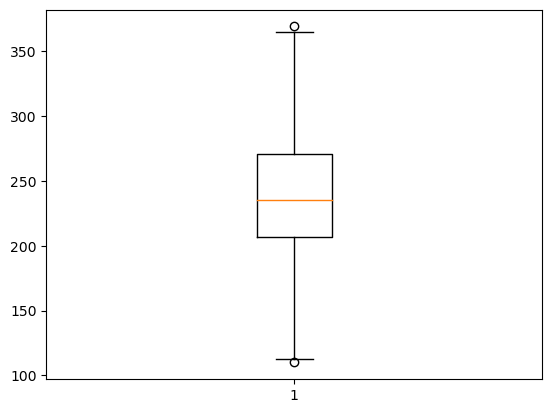

In [93]:
plt.boxplot(df["Cholesterol"])

In [94]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,704.000000,704.000000,704.000000,704.000000,704.000000
mean,52.769886,131.529830,238.924716,0.160511,0.471591
std,9.576281,15.382805,47.672857,0.367341,0.499547
min,28.000000,92.000000,110.000000,0.000000,0.000000
25%,46.000000,120.000000,206.750000,0.000000,0.000000
50%,54.000000,130.000000,235.000000,0.000000,0.000000
75%,59.000000,140.000000,271.000000,0.000000,1.000000
max,77.000000,170.000000,369.000000,1.000000,1.000000


In [95]:
df=df[df['Cholesterol']!=369]

{'whiskers': [<matplotlib.lines.Line2D at 0x16608b75990>,
 'caps': [<matplotlib.lines.Line2D at 0x16608b49550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16608b74d50>],
 'medians': [<matplotlib.lines.Line2D at 0x16608b80650>],
 'fliers': [<matplotlib.lines.Line2D at 0x166089560d0>],
 'means': []}

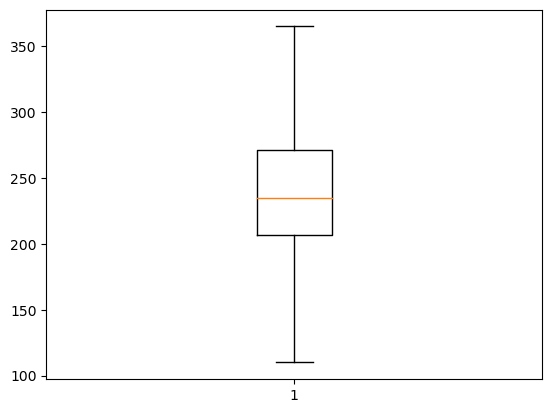

In [96]:
plt.boxplot(df["Cholesterol"])

<Axes: >

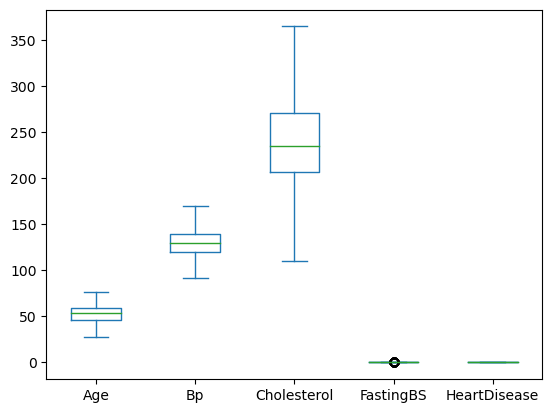

In [97]:
df.plot.box()

In [98]:
df["RestingECG"].value_counts()

Normal    421
LVH       164
ST        118
Name: RestingECG, dtype: int64

In [99]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Sex'>

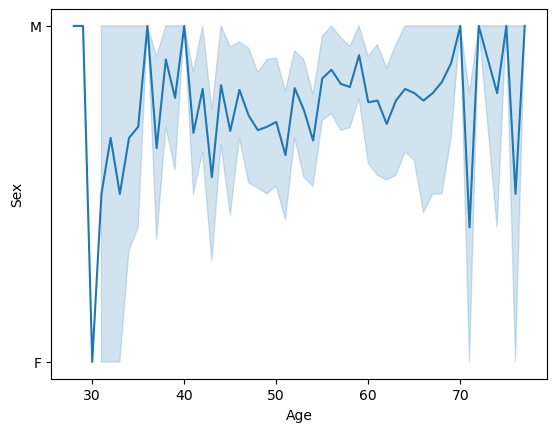

In [100]:
sns.lineplot(data=df,y="Sex",x="Age")

<Axes: xlabel='Bp', ylabel='Count'>

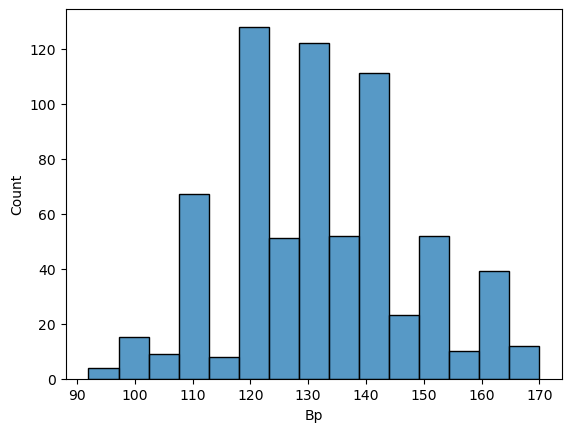

In [101]:
sns.histplot(data=df,x="Bp",bins=15)

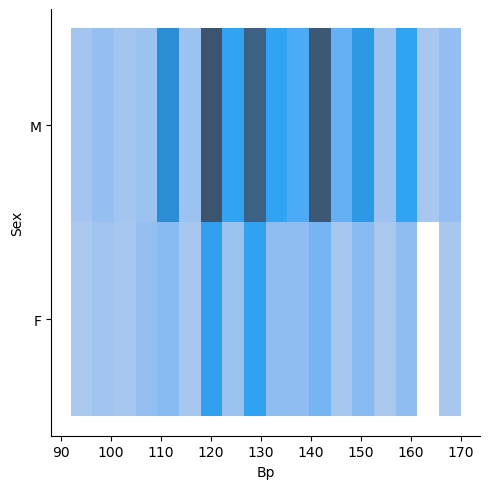

In [102]:
sns.displot(data=df,x="Bp",y="Sex")

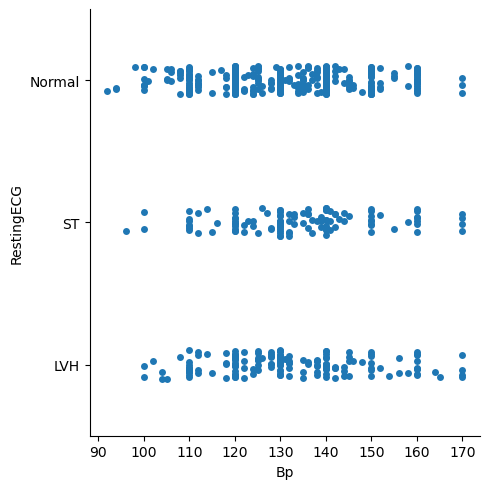

In [103]:
sns.catplot(data=df,x="Bp",y="RestingECG")

<Axes: xlabel='Age', ylabel='ExerciseAngina'>

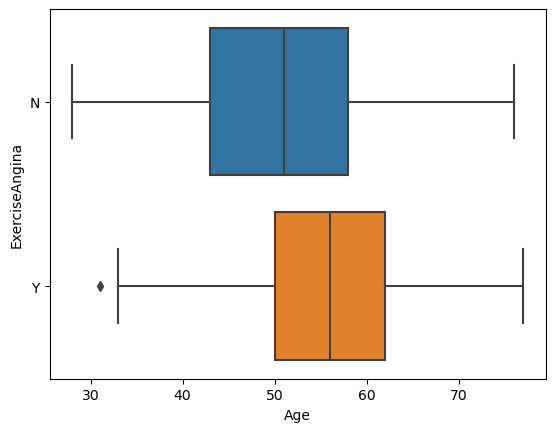

In [104]:
sns.boxplot(data=df,x="Age",y="ExerciseAngina")

<Axes: xlabel='RestingECG', ylabel='count'>

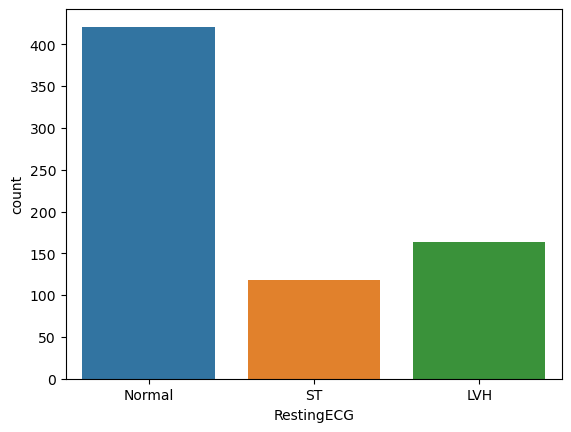

In [105]:
sns.countplot(data=df,x="RestingECG")

In [106]:
df

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,N,Up,0
1,49,F,NAP,160,180,0,Normal,N,Flat,1
2,37,M,ATA,130,283,0,ST,N,Up,0
3,48,F,ASY,138,214,0,Normal,Y,Flat,1
4,54,M,NAP,150,195,0,Normal,N,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,N,Flat,1
914,68,M,ASY,144,193,1,Normal,N,Flat,1
915,57,M,ASY,130,131,0,Normal,Y,Flat,1
916,57,F,ATA,130,236,0,LVH,N,Flat,1


In [107]:
# don't use by sampling trick becouse target column is normal distrubeted
df["HeartDisease"].value_counts()

0    372
1    331
Name: HeartDisease, dtype: int64

In [108]:
df["ST_Slope"].value_counts()

Up      335
Flat    329
Down     39
Name: ST_Slope, dtype: int64

In [109]:
df["ExerciseAngina"].value_counts()

N    436
Y    267
Name: ExerciseAngina, dtype: int64

In [110]:
df["RestingECG"].value_counts()

Normal    421
LVH       164
ST        118
Name: RestingECG, dtype: int64

In [111]:
df["FastingBS"].value_counts()

0    590
1    113
Name: FastingBS, dtype: int64

In [112]:
df["ChestPainType"].value_counts()

ASY    342
NAP    163
ATA    158
TA      40
Name: ChestPainType, dtype: int64

In [113]:
df.describe()

,Age,Bp,Cholesterol,FastingBS,HeartDisease
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,52.749644,131.509246,238.739687,0.160740,0.470839
std,9.568015,15.384053,47.453161,0.367552,0.499504
min,28.000000,92.000000,110.000000,0.000000,0.000000
25%,46.000000,120.000000,206.500000,0.000000,0.000000
50%,54.000000,130.000000,235.000000,0.000000,0.000000
75%,59.000000,140.000000,271.000000,0.000000,1.000000
max,77.000000,170.000000,365.000000,1.000000,1.000000


In [114]:
data.shape

(918, 12)

In [115]:
df.shape

(703, 10)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 917
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             703 non-null    int64 
 1   Sex             703 non-null    object
 2   ChestPainType   703 non-null    object
 3   Bp              703 non-null    int64 
 4   Cholesterol     703 non-null    int64 
 5   FastingBS       703 non-null    int64 
 6   RestingECG      703 non-null    object
 7   ExerciseAngina  703 non-null    object
 8   ST_Slope        703 non-null    object
 9   HeartDisease    703 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 76.6+ KB


In [117]:
df.reset_index(drop=True,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             703 non-null    int64 
 1   Sex             703 non-null    object
 2   ChestPainType   703 non-null    object
 3   Bp              703 non-null    int64 
 4   Cholesterol     703 non-null    int64 
 5   FastingBS       703 non-null    int64 
 6   RestingECG      703 non-null    object
 7   ExerciseAngina  703 non-null    object
 8   ST_Slope        703 non-null    object
 9   HeartDisease    703 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 55.1+ KB


In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
label_encoder=LabelEncoder()

In [121]:
df["ST_Slope"]=label_encoder.fit_transform(df["ST_Slope"])

In [122]:
df["ExerciseAngina"]=label_encoder.fit_transform(df["ExerciseAngina"])
df["RestingECG"]=label_encoder.fit_transform(df["RestingECG"])
df["ChestPainType"]=label_encoder.fit_transform(df["ChestPainType"])

In [123]:
df["Sex"]=label_encoder.fit_transform(df["Sex"])

In [124]:
df

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,0,2,0
1,49,0,2,160,180,0,1,0,1,1
2,37,1,1,130,283,0,2,0,2,0
3,48,0,0,138,214,0,1,1,1,1
4,54,1,2,150,195,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...
698,45,1,3,110,264,0,1,0,1,1
699,68,1,0,144,193,1,1,0,1,1
700,57,1,0,130,131,0,1,1,1,1
701,57,0,1,130,236,0,0,0,1,1


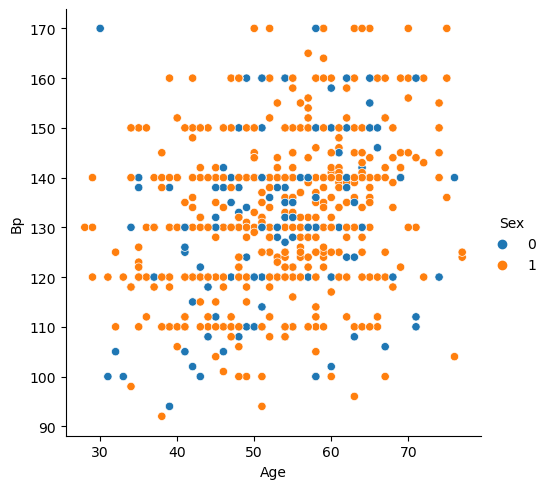

In [125]:
# using by realtional plots
sns.relplot(data=df,x="Age",y="Bp",hue="Sex")

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler=StandardScaler()

In [128]:
standardize=scaler.fit_transform(df)

<Axes: xlabel='Cholesterol', ylabel='Age'>

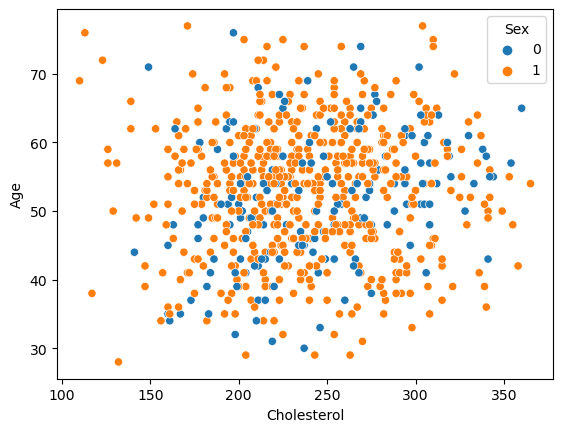

In [129]:
sns.scatterplot(data=df,x="Cholesterol",y="Age",hue="Sex")

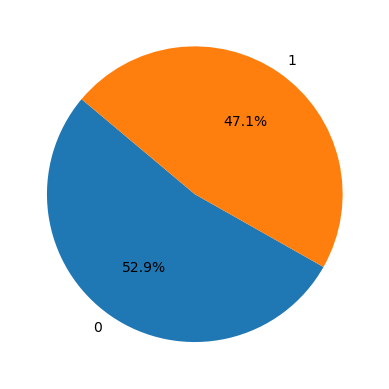

In [130]:
plt.pie(df["HeartDisease"].value_counts(),labels=df["HeartDisease"].unique(),autopct='%1.1f%%', startangle=140)
#plt.pei(df[""])
plt.show()

In [131]:
x=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=25)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
model=LinearRegression()

In [136]:
model.fit(x_train,y_train)

LinearRegression()

In [149]:
#tray_pred=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred

array([ 0.17187187,  0.76273021, -0.05748663,  0.23744505,  0.04180636,
        0.60855127, -0.1139764 ,  0.77532544,  0.14925081,  0.55791811,
        1.03865667,  0.27609186,  0.17315442,  0.77953246,  0.8585997 ,
        0.33340467,  0.43723204,  0.61171361,  0.21284012,  0.15952261,
        0.0737094 ,  0.13316579,  0.50683306,  0.73800391,  0.43177859,
        0.76538647,  0.73730105,  0.10261248,  0.28109656,  0.85708197,
       -0.04140475, -0.09123926,  0.24037643,  0.87892786,  0.59184093,
        0.89971425,  0.45576586,  0.22375629,  0.55943738,  0.68880795,
        0.48863699,  0.17480613,  0.05549857, -0.09450922,  0.7339545 ,
        1.38326088,  0.91155767,  1.32750478,  0.67190946,  0.90782652,
        0.03205011,  0.5730402 ,  0.51878814,  0.64161664, -0.05694927,
        0.1550303 ,  0.33110831,  0.6862702 ,  0.97334477,  0.91377221,
       -0.08474036,  0.05510165,  0.8127046 ,  0.10941607, -0.00177644,
        0.97144844,  0.86441384,  0.50057073,  0.68120829,  0.63

In [138]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [148]:
accuracy_score(y_pred,y_test)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [143]:
y_train

555    0
470    0
575    1
373    1
420    1
      ..
317    0
143    1
474    0
318    1
132    0
Name: HeartDisease, Length: 527, dtype: int64

In [150]:
y_test

587    0
307    1
125    0
113    0
219    0
      ..
377    1
392    0
149    1
489    0
422    0
Name: HeartDisease, Length: 176, dtype: int64

In [151]:
x_test

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope
587,53,1,2,130,246,1,0,0,2
307,64,0,0,142,276,0,1,1,1
125,43,0,1,120,215,0,2,0,2
113,46,1,0,110,240,0,2,0,2
219,54,0,1,140,309,0,2,0,2
...,...,...,...,...,...,...,...,...,...
377,69,1,0,142,210,1,2,1,1
392,58,1,0,100,213,0,2,0,2
149,49,1,0,128,212,0,1,1,1
489,56,1,1,120,236,0,1,0,2


In [152]:
x_train

,Age,Sex,ChestPainType,Bp,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope
555,41,0,2,112,268,0,0,1,2
470,57,1,2,150,126,1,1,0,2
575,69,1,2,140,254,0,0,0,1
373,56,1,0,128,223,0,2,1,0
420,59,1,0,110,239,0,0,1,1
...,...,...,...,...,...,...,...,...,...
317,40,1,2,106,240,0,1,1,2
143,56,1,0,155,342,1,1,1,1
474,63,1,3,145,233,1,0,0,0
318,58,1,0,110,198,0,1,0,1
